<b>
<p>
<center>
<font size="5">
Sign Language Gesture
</font>
</center>
</p>

<p>
<center>
<font size="4">
Convolutional Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Final Project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
- Ricardo Diaz
- Osemekhian Ehilen
- Varun Shan
</font>
</center>
</p>
</b>

## Overview

- Here we will work on Signature Language Dataset [Kaggle Link](https://www.kaggle.com/datasets/ahmedkhanak1995/sign-language-gesture-images-dataset).
- The goal of this project is to be able to identify correctly the different signed languages where the user can upload images and the CNN model will tell the user which character or number it represents. 
- Reference for functions:
[Github Link Dr.Yuxiao Huang](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/utilities/p2_shallow_learning/pmlm_utilities_shallow.ipynb)



## Google Drive


In [3]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/Final_Project'


# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/code/utilities/p3_deep_learning/'

Mounted at /content/drive


## Matplotlib

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## Tensorflow

In [5]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random Seed

In [6]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

## Data Preprocessing

In [7]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/code/utilities/p3_deep_learning


## Setting Up Kaggle Api

In [8]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/code/utilities/p3_deep_learning'

In [9]:
!pip install kaggle

In [10]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
# # Then move kaggle.json into the folder where the API expects to find it.
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [11]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

OSError: ignored

In [ ]:
#Second Way
#kaggle datasets download -d ahmedkhanak1995/sign-language-gesture-images-dataset
#!unzip signs-language-gesture-images-dataset.zip

In [ ]:
api.dataset_download_files('ahmedkhanak1995/sign-language-gesture-images-dataset')


In [ ]:
from zipfile import ZipFile


In [ ]:
zf = ZipFile('sign-language-gesture-images-dataset.zip')
#extracted data is saved in the same directory as notebook
zf.extractall('/content/drive/My Drive/Colab Notebooks/Final_Project/data') #path here 
zf.close()

## Loading Data


In [12]:
data = '/content/drive/My Drive/Colab Notebooks/Final_Project/data/Gesture Image Data'

In [13]:
categories = os.listdir(data)

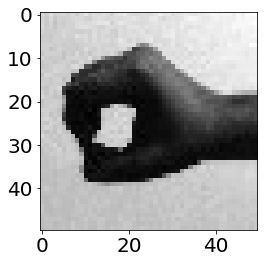

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
for x in categories:
  path = os.path.join(data,x)
  for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
  break  #...and one more!    


In [15]:
type(img_array)

numpy.ndarray

In [16]:
img_array.shape

(50, 50)

In [17]:
training_data = []

Remenber the data is in different folders and the label is the name of the folder

In [18]:

for y in categories:
  path = os.path.join(data,y)
  for img in os.listdir(path):
    try:
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(50,50))  # convert to array
        training_data.append([new_array, y])
    except Exception as e:
      pass


In [19]:
len(training_data)

55486

In [20]:
training_data[1]

[array([[ 97, 100,  97, ..., 116, 118, 117],
        [ 96,  99,  97, ..., 118, 118, 118],
        [ 96,  99,  97, ..., 116, 115, 115],
        ...,
        [ 85,  86,  85, ...,  89,  89,  90],
        [ 88,  85,  84, ...,  89,  89,  88],
        [ 87,  84,  84, ...,  90,  90,  89]], dtype=uint8), '0']

In [21]:
import random 

random.shuffle(training_data)

In [22]:
training_data[1]

[array([[170, 170, 173, ..., 178, 176, 176],
        [169, 168, 170, ..., 177, 177, 177],
        [169, 175, 156, ..., 177, 177, 177],
        ...,
        [175, 175, 176, ..., 197, 195, 195],
        [173, 176, 175, ..., 196, 194, 193],
        [173, 176, 175, ..., 196, 194, 193]], dtype=uint8), 'I']

In [23]:
type(training_data)

list

In [24]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)



In [25]:
X = np.array(X)
Y = np.array(Y)

In [96]:
X.shape[1:]

(50, 50, 1)

In [52]:
Y

array(['C', 'I', 'J', ..., 'X', 'V', 'D'], dtype='<U1')

In [53]:
transdict = {'_':1,
    '0':2,
    '1':3,
    '2':4,
    '3':5,
    '4':6,
    '5':7,
    '6':8,
    '7':9,
    '8':10,
    '9':11,
    'A':12,
    'B':13,
    'C':14,
    'D':15,
    'E':16,
    'F':17,
    'G':18,
    'H':19,
    'I':20,
    'J':21,
    'K':22,
    'L':23,
    'M':24,
    'N':25,
    'O':26,
    'P':27,
    'Q':28,
    'R':29,
    'S':30,
    'T':31,
    'U':32,
    'V':33,
    'W':34,
    'X':35,
    'Y':36,
    'Z':37,
}

transform_Y = [transdict[letter] for letter in Y]

In [77]:
len(transform_Y)

55486

In [83]:
#transform_Y

In [104]:
Y = np.array(transform_Y)

In [105]:
type(X)

numpy.ndarray

In [111]:
Y


array([14, 20, 21, ..., 35, 33, 15])

We may need to impleted this, I cant run the model using the Y shape I have. I dont understand why we would have to do the binary class matrix
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

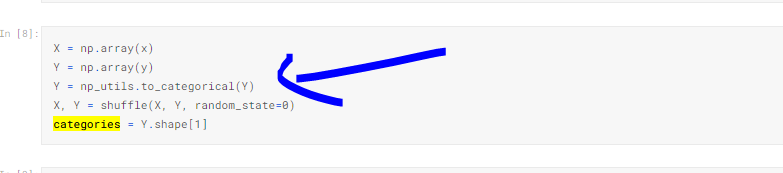

In [27]:
# Making it 3D 
X = np.array(X).reshape(-1,50,50,1)
# Normalizing
X = X/255

In [28]:
X.shape

(55486, 50, 50, 1)

In [76]:
Y.shape

(55486,)

## Saving Data 

In [57]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

## Getting the Training, Validation and Test Dataset

In [58]:
X = pickle.load(open('X.pickle','rb'))
Y = pickle.load(open('y.pickle','rb'))

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.3, random_state=random_seed, stratify=Y)

# We may dont need this because we can do a validation split in the model.fit
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=random_seed, stratify=y_train)

In [107]:
y_train.shape #this shape may be wrong

(27188,)

In [38]:
X_train.shape

(27188, 50, 50, 1)

In [39]:
X_val.shape

(11652, 50, 50, 1)

In [40]:
X_test.shape

(16646, 50, 50, 1)

## Transforming Array to Tensor Dataset 

In [68]:
data_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_valid = tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [42]:
type(data_train)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [62]:
# Set the batch size
batch_size = 20

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

## Training 

In [63]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Building Model

In [101]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 5, activation='relu', input_shape=(50, 50, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 2, activation='relu'),
    keras.layers.Conv2D(64, 2, activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 2, activation='relu'),
    keras.layers.Conv2D(128, 2, activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [102]:
# Compile the model
model.compile(optimizer= 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Using Arrays (Doesnt Work)

In [109]:
X.shape

(55486, 50, 50, 1)

In [108]:
Y.shape

(55486,)

In [110]:
model.fit(X,Y, batch_size = 32, epochs = 3,validation_split = 0.3)

Epoch 1/3


ValueError: ignored

## Using TensorSlide Dataset (Doesnt work)

In [72]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model_final',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=2)

In [82]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5


ValueError: ignored

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)


In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve.pdf')
plt.show()